In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

#from __future__ import print_function

In [ ]:
#Load the dataset

data_frame = pd.read_csv("Crop_recommendation.csv")

In [ ]:
data_frame.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_name
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data_frame.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_name
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


#Heat Map To Check Null/Missing Value

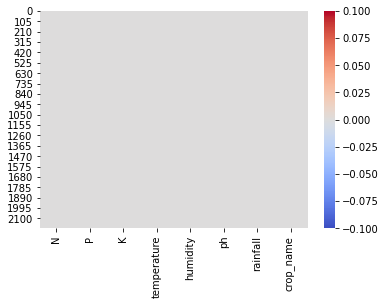

In [ ]:
sn.heatmap(data_frame.isnull(),cmap="coolwarm")
plt.show()

In [ ]:
data_frame.shape

(2200, 8)

In [ ]:
data_frame.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
       'crop_name'],
      dtype='object')

In [ ]:
data_frame['crop_name'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
data_frame['crop_name'].value_counts()

maize          100
pigeonpeas     100
muskmelon      100
mango          100
coconut        100
blackgram      100
jute           100
chickpea       100
watermelon     100
cotton         100
lentil         100
coffee         100
kidneybeans    100
mungbean       100
grapes         100
mothbeans      100
rice           100
papaya         100
banana         100
pomegranate    100
apple          100
orange         100
Name: crop_name, dtype: int64

In [ ]:
data_frame.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
crop_name       object
dtype: object

#DATA PRE-PROCESSING

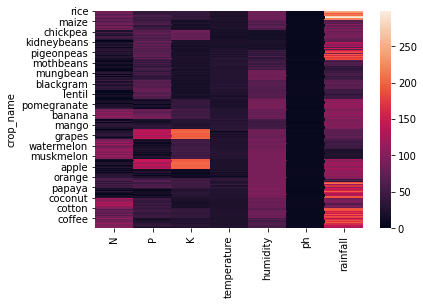

In [ ]:
x = data_frame[['N' , 'P' , 'K' , 'temperature' , 'humidity' , 'ph' , 'rainfall']]
y = data_frame['crop_name']
#labels = df['label']
new_df = data_frame.set_index('crop_name')
sn.heatmap(new_df)

In [ ]:
#sn.heatmap(x.corr())
#Correlation visualization between features. We can see how Phosphorous levels and Potassium levels are highly correlated.
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: crop_name, Length: 2200, dtype: object

In [ ]:
# Initializing empty lists to append all model's name and corresponding name

algorithm_accuracy = []
algorithm = []

# Splitting the dataset into train and test data

In [ ]:
# Splitting the dataset into train and test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.2 , random_state =2)
y_test[lambda x: x=='lentil']


810    lentil
885    lentil
814    lentil
826    lentil
816    lentil
844    lentil
837    lentil
827    lentil
888    lentil
861    lentil
849    lentil
874    lentil
840    lentil
823    lentil
842    lentil
846    lentil
848    lentil
897    lentil
804    lentil
856    lentil
835    lentil
831    lentil
851    lentil
Name: crop_name, dtype: object

#Implementation of Logistic Regression

In [ ]:
#Implementation of Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.iolib import summary, summary2

Logistic_Regression = LogisticRegression(random_state = 2)

result = Logistic_Regression.fit(x_train , y_train)

y_pred = Logistic_Regression.predict(x_test)
pd.Series(y_pred)[lambda x: x=='rice']



##############################3




28     rice
60     rice
82     rice
90     rice
121    rice
146    rice
165    rice
188    rice
211    rice
251    rice
292    rice
391    rice
395    rice
dtype: object

In [ ]:
#Confusion Matrix for Logistic Regression

ConfusionMatrix = confusion_matrix(y_test,y_pred)

ConfusionMatrix_dataframe = pd.DataFrame(ConfusionMatrix , index = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'] , columns = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'])

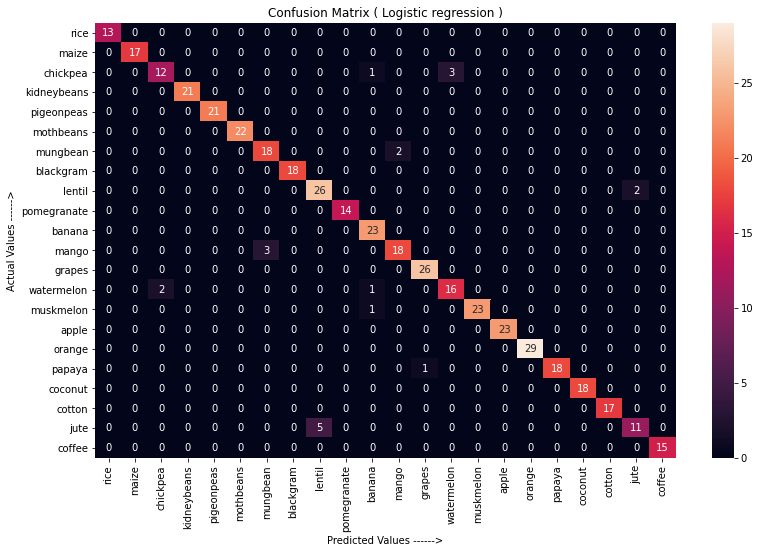

In [ ]:
#Plotting the confusion matrix for Logistic regression
plt.figure(figsize=(13,8))
sn.heatmap(ConfusionMatrix_dataframe, annot=True)
plt.title('Confusion Matrix ( Logistic regression )')
plt.ylabel('Actual Values ------>')
plt.xlabel('Predicted Values ------>')
plt.show()

In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]:
           TP += 1
        if y_actual[i]!=y_hat[i]:
           FP += 1
        # if y_actual[i]==y_hat[i]:
        #    TN += 1
        # if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
        #    FN += 1

    return(TP, FP)

In [ ]:
y_rice_predict = pd.Series(y_pred).to_numpy()
#y_rice_predict[y_rice_predict == 'chickpea'] = 1
#y_rice_predict
#type(y_rice_predict)
y_rice_test = y_test.to_numpy()
#y_rice_test
#type(y_rice_test)
perf_measure(y_rice_test, y_rice_predict)

(419, 21)

In [ ]:
#Accuracy of Logistic Regression

accuracy = metrics.accuracy_score(y_test , y_pred)

algorithm_accuracy.append(accuracy)
algorithm.append('Logistic Regression')

print(classification_report(y_test , y_pred))

print("\n Logistic Regression's Accuracy is" , 'i.e', (accuracy*100),'%')

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

#Implementation of Support Vector Machine

In [ ]:
#Implementation of Support Vector Machine

from sklearn.svm import SVC

SVM = SVC(gamma='auto')
SVM.fit(x_train,y_train)

y_pred = SVM.predict(x_test)

In [ ]:
#Confusion Matrix for Support Vector Machine

'''ConfusionMatrix = confusion_matrix(y_test , y_pred)
print(ConfusionMatrix)'''
ConfusionMatrix = confusion_matrix(y_test, y_pred)

ConfusionMatrix_dataframe = pd.DataFrame(ConfusionMatrix , index = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'] , columns = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'])

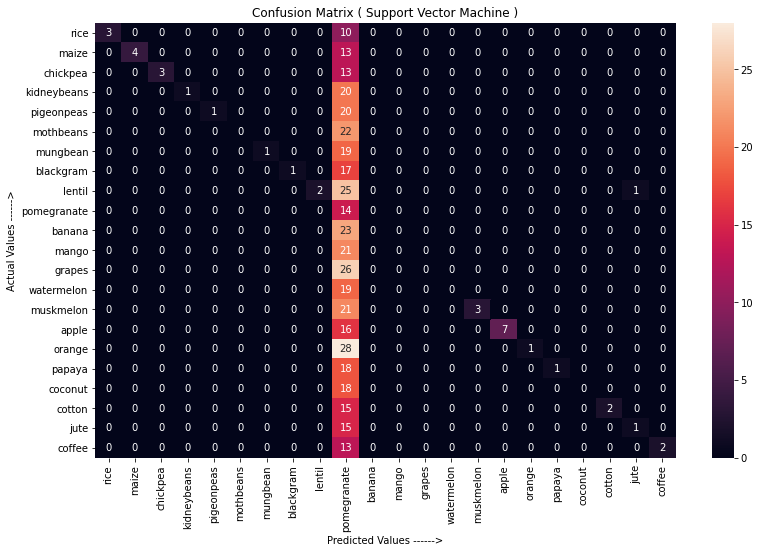

In [ ]:
#Plotting the confusion matrix for Support Vector Machine
plt.figure(figsize=(13,8))
sn.heatmap(ConfusionMatrix_dataframe, annot=True)
plt.title('Confusion Matrix ( Support Vector Machine )')
plt.ylabel('Actual Values ------>')
plt.xlabel('Predicted Values ------>')
plt.show()

In [ ]:
#Accuracy of Support Vector Machine

accuracy = metrics.accuracy_score(y_test, y_pred)

algorithm_accuracy.append(accuracy)
algorithm.append('Support Vector Machine')

print(classification_report(y_test,y_pred))
print("SVM's Accuracy is: ", accuracy , 'i.e', (accuracy*100),'%')

              precision    recall  f1-score   support

       apple       1.00      0.23      0.38        13
      banana       1.00      0.24      0.38        17
   blackgram       1.00      0.19      0.32        16
    chickpea       1.00      0.05      0.09        21
     coconut       1.00      0.05      0.09        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.06      0.11        18
        jute       1.00      0.07      0.13        28
 kidneybeans       0.03      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.30      0.47        23
      orange       1.00      0.03      0.07        29
      papaya       1.00    

#Implementation of Decision Tree

In [ ]:
#Implementation of Decision Tree

from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(x_train,y_train)

y_pred = DecisionTree.predict(x_test)

In [ ]:
#Confusion Matrix for Decision Tree

ConfusionMatrix = confusion_matrix(y_test, y_pred)

ConfusionMatrix_dataframe = pd.DataFrame(ConfusionMatrix , index = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'] , columns = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'])

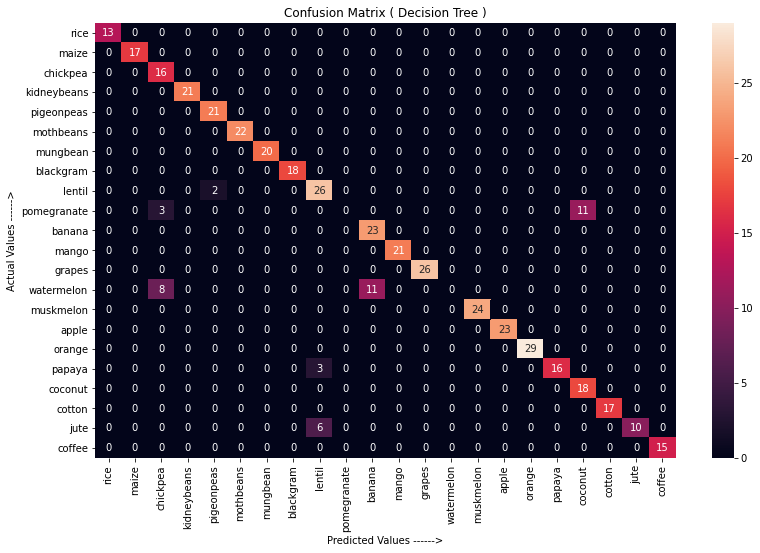

In [ ]:
#Plotting the confusion matrix for Support Vector Machine
plt.figure(figsize=(13,8))
sn.heatmap(ConfusionMatrix_dataframe, annot=True)
plt.title('Confusion Matrix ( Decision Tree )')
plt.ylabel('Actual Values ------>')
plt.xlabel('Predicted Values ------>')
plt.show()

In [ ]:
#Accuracy of Decision Tree

accuracy = metrics.accuracy_score(y_test, y_pred)

algorithm_accuracy.append(accuracy)
algorithm.append('Decision Tree')

print(classification_report(y_test,y_pred))
print("Decision Tree's Accuracy is: ", accuracy , 'i.e', (accuracy*100),'%')

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

#Implementation of Random Forest

In [ ]:
#Implementation of Random Forest

from sklearn.ensemble import RandomForestClassifier

Random_Forest = RandomForestClassifier(n_estimators = 20 , random_state = 0)
Random_Forest.fit(x_train , y_train)

y_pred = Random_Forest.predict(x_test)

In [ ]:
#Confusion Matrix for Random Forest

ConfusionMatrix = confusion_matrix(y_test, y_pred)

ConfusionMatrix_dataframe = pd.DataFrame(ConfusionMatrix , index = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'] , columns = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'])

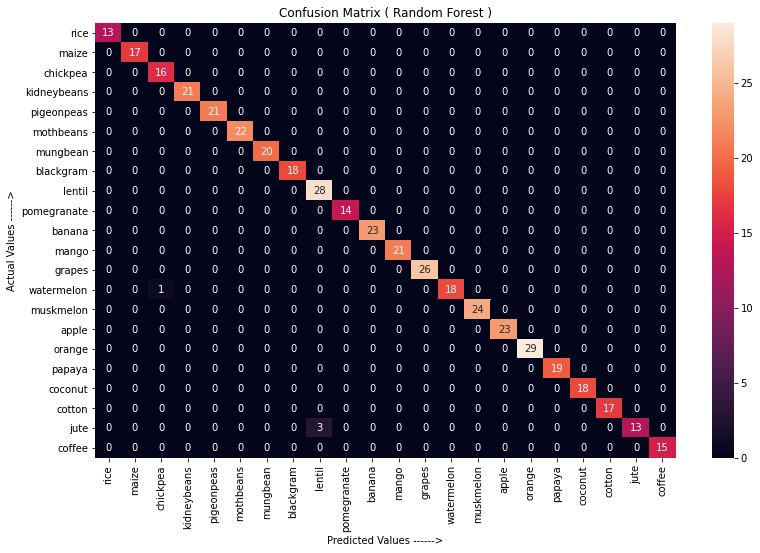

In [ ]:
#Plotting the confusion matrix for Random Forest
plt.figure(figsize=(13,8))
sn.heatmap(ConfusionMatrix_dataframe, annot=True)
plt.title('Confusion Matrix ( Random Forest )')
plt.ylabel('Actual Values ------>')
plt.xlabel('Predicted Values ------>')
plt.show()

In [ ]:
#Accuracy of Random Forest

accuracy = metrics.accuracy_score(y_test , y_pred)

algorithm_accuracy.append(accuracy)
algorithm.append('Random Forest')

print(classification_report(y_test , y_pred))

print("\n Random Forest's Accuracy is" , 'i.e', (accuracy*100),'%')

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

#Visual Representation of the ALGORITHMS

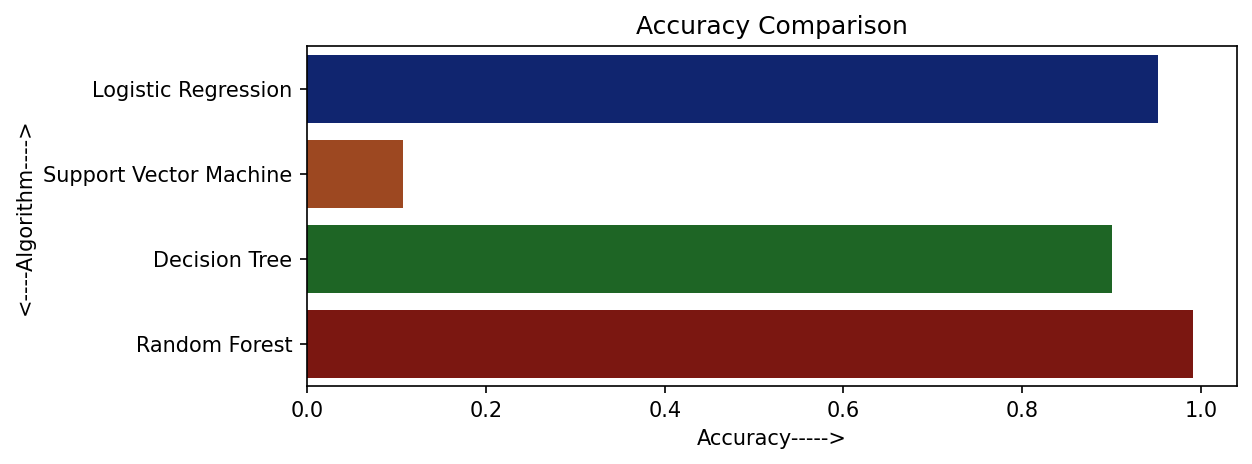

In [ ]:
#Visual Representation of the ALGORITHMS 

plt.figure(figsize=[8,3],dpi = 150)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy----->')
plt.ylabel('<----Algorithm---->')
sn.barplot(x = algorithm_accuracy , y = algorithm , palette='dark')

In [ ]:
accuracy_models = dict(zip(algorithm, algorithm_accuracy))
for i, acc in accuracy_models.items():
    print (i, '=', (acc*100),"%\n")

In [ ]:
data1 = np.array([[79,	42,	42,	20.130175, 81.604873,7.628473, 262.717340]])
prediction = Logistic_Regression.predict(data1)
print(prediction)

In [ ]:
rainfall = 0
while(rainfall < 12000):
  data2 = np.array([[-30,	42,	89,	155,	20,	100, rainfall]])
  prediction = Random_Forest.predict(data2)
  print('For rainfall between ', rainfall, ' to ', (rainfall+100),' = ', prediction)
  rainfall = ( rainfall + 100 )

'''
data2 = np.array([[79,	42,	42,	20.130175, 81.604873,7.628473, 262.717340]])
prediction = Random_Forest.predict(data2)
print(prediction)
'''



In [ ]:
from sklearn.tree import plot_tree

rf_small = RandomForestClassifier(n_estimators=10, max_depth=3)
#rf_small = RandomForestClassifier(n_estimators=10)
rf_small.fit(x_train , y_train)


In [ ]:
tree_small = rf_small.estimators_[5]

fig = plt.figure(figsize=(15,10))
plot_tree(rf_small.estimators_[0], filled='True' , impurity='True', rounded='True')

In [ ]:
fig.savefig("Random_Forest.png")